# Data Cleaning and Processing

### With the acquired headphone data:
- Clean this dataset by first removing attributes(columns) and products(rows) that contain mostly missing data
- Reformat columns with numeric data (such as weight and height) from a string to a float for subsequent analysis
- Rename headphone manufacturer names that have special characters such as "®" or "™" to ensure consistent labelling
- Remove products that were incorrectly labelled as headphones

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
from fractions import Fraction
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

#custom display options
mpl.rcParams['figure.dpi'] = 300
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

In [2]:
#load and observe the data
df = pd.read_csv("Data/Headphones.csv", sep=",", header=0, index_col=0,low_memory = False)
print("rows: {}, columns: {}".format(df.shape[0],df.shape[1]))
df.head(3)

rows: 8886, columns: 189


,sku,score,productId,name,source,type,startDate,new,active,lowPriceGuarantee,activeUpdateDate,regularPrice,salePrice,clearance,onSale,planPrice,priceWithPlan,contracts,priceRestriction,priceUpdateDate,digital,preowned,carriers,planFeatures,devices,carrierPlans,technologyCode,carrierModelNumber,earlyTerminationFees,monthlyRecurringCharge,monthlyRecurringChargeGrandTotal,activationCharge,minutePrice,planCategory,planType,familyIndividualCode,validFrom,validUntil,carrierPlan,outletCenter,secondaryMarket,frequentlyPurchasedWith,accessories,relatedProducts,requiredParts,techSupportPlans,crossSell,salesRankShortTerm,salesRankMediumTerm,salesRankLongTerm,bestSellingRank,url,spin360Url,mobileUrl,affiliateUrl,addToCartUrl,affiliateAddToCartUrl,linkShareAffiliateUrl,linkShareAffiliateAddToCartUrl,search,upc,productTemplate,categoryPath,alternateCategories,lists,customerReviewCount,customerReviewAverage,customerTopRated,format,freeShipping,freeShippingEligible,inStoreAvailability,inStoreAvailabilityText,inStoreAvailabilityTextHtml,inStoreAvailabilityUpdateDate,itemUpdateDate,onlineAvailability,onlineAvailabilityText,onlineAvailabilityTextHtml,onlineAvailabilityUpdateDate,releaseDate,shippingCost,shipping,shippingLevelsOfService,specialOrder,shortDescription,shortDescriptionHtml,class,classId,subclass,subclassId,department,departmentId,bestBuyItemId,protectionPlanTerm,protectionPlanType,protectionPlanLowPrice,protectionPlanHighPrice,buybackPlans,protectionPlans,protectionPlanDetails,productFamilies,productVariations,aspectRatio,screenFormat,lengthInMinutes,mpaaRating,plot,plotHtml,studio,theatricalReleaseDate,description,manufacturer,modelNumber,images,image,largeFrontImage,mediumImage,thumbnailImage,largeImage,alternateViewsImage,angleImage,backViewImage,energyGuideImage,leftViewImage,accessoriesImage,remoteControlImage,rightViewImage,topViewImage,albumTitle,artistName,artistId,originalReleaseDate,parentalAdvisory,mediaCount,monoStereo,studioLive,condition,inStorePickup,friendsAndFamilyPickup,homeDelivery,quantityLimit,fulfilledBy,members,bundledIn,albumLabel,genre,color,depth,dollarSavings,percentSavings,tradeInValue,height,orderable,weight,shippingWeight,width,warrantyLabor,warrantyParts,softwareAge,softwareGrade,platform,numberOfPlayers,softwareNumberOfPlayers,esrbRating,longDescription,longDescriptionHtml,cast,crew,details,includedItemList,features,offers,marketplace,listingId,sellerId,shippingRestrictions,discs,commerceSku,haulawayAvailable,proposition65WarningMessage,proposition65WarningType,collection,powerSource,totalHarmonicDistortion,multiroomCapability,numberOfSpeakers,numberOfChannels,headphoneJacks
0,6454189,NaN,NaN,Shure - KSE1500 Electrostatic Earphones System...,NaN,HardGood,2021-03-08,False,False,True,2021-11-16T00:01:40,2999.98,2999.98,False,False,NaN,[],[],NaN,2021-03-08T00:00:29,False,False,[],[],[],[],NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42406397742,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",[],[],1.0,5.0,False,NaN,True,False,False,NaN,NaN,2021-11-08T11:47:14,2021-12-28T19:57:17,False,NaN,NaN,2021-11-08T11:47:14,NaN,0.0,[],[],False,NaN,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,NaN,SHU,NaN,NaN,NaN,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shure,SHU KSE1500SYSUS,"[{'rel': 'Front_Zoom', 'unitOfMeasure': 'pixel...",https://pisces.bbystatic.com/prescaled/500/500...,https://pisces.bbystatic.com/image2/BestBuy_US...,https://pisces.bbystatic.com/prescaled/140/70/...,https://pisces.bbystatic.com/prescaled/108/54/...,https://pisces.bbystatic.com/prescaled/160/220...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KSE1500 Electrostatic Earphones System,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,False,True,False,5.0,NaN,[],[],NaN,NaN,Black,NaN,0.0,0.0,NaN,NaN,NotOrderable,NaN,3.75,NaN,Every Shure® product comes with a Limited Warr...,Every Shure® product comes with a Limited Warr...,NaN,NaN,NaN

#### Various columns such as 'carriers', 'devices' , 'accessories' contain the empty string '[]'. Replace this string with None, and then obtain information about each column.

In [3]:
df = df[~df.isin(["[]"])]
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 8885
Data columns (total 189 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    sku                               8886 non-null   int64  
 1    score                             0 non-null      float64
 2    productId                         0 non-null      float64
 3    name                              8886 non-null   object 
 4    source                            0 non-null      float64
 5    type                              8886 non-null   object 
 6    startDate                         8795 non-null   object 
 7    new                               8886 non-null   bool   
 8    active                            8886 non-null   bool   
 9    lowPriceGuarantee                 8886 non-null   bool   
 10   activeUpdateDate                  8886 non-null   object 
 11   regularPrice                      8886 non-null   floa

### Remove columns that have less than 1000 entries of data (non-null) and rows where half the data is null. 

In [4]:
df = df.loc[:,df.isnull().sum() < len(df)-1000]
df = df.dropna(thresh = len(df.columns)/2)
df = df.reset_index(drop = True)
print("rows: {}, columns: {}".format(df.shape[0],df.shape[1]))
df.head(3)

rows: 8886, columns: 77


,sku,name,type,startDate,new,active,lowPriceGuarantee,activeUpdateDate,regularPrice,salePrice,clearance,onSale,priceUpdateDate,digital,preowned,upc,productTemplate,categoryPath,alternateCategories,customerReviewCount,customerReviewAverage,customerTopRated,freeShipping,freeShippingEligible,inStoreAvailability,inStoreAvailabilityUpdateDate,itemUpdateDate,onlineAvailability,onlineAvailabilityUpdateDate,releaseDate,shippingCost,specialOrder,shortDescription,shortDescriptionHtml,class,classId,subclass,subclassId,department,departmentId,protectionPlanTerm,productVariations,manufacturer,modelNumber,images,image,largeFrontImage,mediumImage,thumbnailImage,largeImage,alternateViewsImage,angleImage,leftViewImage,albumTitle,condition,inStorePickup,friendsAndFamilyPickup,homeDelivery,quantityLimit,color,depth,dollarSavings,percentSavings,height,orderable,weight,shippingWeight,width,warrantyLabor,warrantyParts,longDescription,longDescriptionHtml,details,includedItemList,features,commerceSku,proposition65WarningType
0,6454189,Shure - KSE1500 Electrostatic Earphones System...,HardGood,2021-03-08,False,False,True,2021-11-16T00:01:40,2999.98,2999.98,False,False,2021-03-08T00:00:29,False,False,42406397742,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,1.0,5.0,False,True,False,False,2021-11-08T11:47:14,2021-12-28T19:57:17,False,2021-11-08T11:47:14,NaN,0.0,False,NaN,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,SHU,NaN,Shure,SHU KSE1500SYSUS,"[{'rel': 'Front_Zoom', 'unitOfMeasure': 'pixel...",https://pisces.bbystatic.com/prescaled/500/500...,https://pisces.bbystatic.com/image2/BestBuy_US...,https://pisces.bbystatic.com/prescaled/140/70/...,https://pisces.bbystatic.com/prescaled/108/54/...,https://pisces.bbystatic.com/prescaled/160/220...,NaN,NaN,NaN,KSE1500 Electrostatic Earphones System,New,False,True,False,5.0,Black,NaN,0.0,0.0,NaN,NotOrderable,NaN,3.75,NaN,Every Shure® product comes with a Limited Warr...,Every Shure® product comes with a Limited Warr...,KSE1500 is capable of processing digital audio...,KSE1500 is capable of processing digital audio...,"[{'name': 'Headphone Fit', 'value': 'In-Ear', ...",NaN,[{'feature': 'Selectable digital or analogue i...,6454189,4
1,6227404,Pioneer - SE MASTER1 Wired Over-the-Ear Headph...,HardGood,2018-04-11,False,False,True,2020-02-28T19:24:10,2499.98,2499.98,False,False,2020-02-28T19:24:10,False,False,884938279901,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,2.0,3.0,False,NaN,False,False,2020-06-26T03:56:37,2022-01-11T16:04:32,False,2020-06-26T03:56:37,NaN,NaN,False,Stereo output mode,<ul><li>Stereo output mode</li></ul>,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,PIO,NaN,Pioneer,SEMASTER1,"[{'rel': 'Front_Zoom', 'unitOfMeasure': 'pixel...",https://pisces.bbystatic.com/prescaled/500/500...,https://pisces.bbystatic.com/image2/BestBuy_US...,https://pisces.bbystatic.com/prescaled/140/70/...,https://pisces.bbystatic.com/prescaled/108/54/...,https://pisces.bbystatic.com/prescaled/160/220...,https://pisces.bbystatic.com/image2/BestBuy_US...,https://pisces.bbystatic.com/image2/BestBuy_US...,NaN,SE MASTER1 Wired Over-the-Ear Headphones,New,False,False,False,5.0,Silver/Black,NaN,0.0,0.0,NaN,NotOrderable,1.01 pounds,6.50,NaN,1 Year,1 Year,Equip your hi-fi room with these Pioneer over-...,Equip your hi-fi room with these Pioneer over-...,"[{'name': 'Sound Isolating', 'value': 'No', 'v...","[{'includedItem': 'Pioneer SE-MASTER1'}, {'inc...",[{'feature': 'High-resolution playback\nThe SE...,6227404,1
2,6135450,Sennheiser - HDV 820 Digital Headphones Amplif...,HardGood,2017-11-15,False,False,True,2022-04-19T00:00:44,2399.98,2399.98,False,False,2020-02-28T16:05:00,False,False,615104301450,Headphone_Amplifiers,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,2.0,5.0,False,True,False,False,2022-04-11T17:39:13,2022-07-11T08:21:30,False,2022-04-11T17:39:13,NaN,0.0,False,NaN,NaN,MHT HEADPHONE,601,SO MHT HEADPHO

### Columns such as 'depth', 'width', 'height'  and 'weight' are encoded as a string containing fractions, decimals and different imperial units. Convert these columns to a float with a single unit. 

In [5]:
def Float_Converter(input_column):
     
    '''
    Float_Converter takes a specific column name from the headphones dataframe as input and converts
                    the string entries into floats. 
    
    :param input_column: A string containing either the 'depth', 'width', 'height' or 'weight'
                         column name from the headphones dataframe.
    :return: list of floats that represent a single imperic unit (ounces for weight and inches for 
             depth, width and height)
    ''' 
    float_list = []
    for entry in df[input_column]:
        
        #Convert only the entries that are strings (not null) to floats. 
        if type(entry) == str:
            
            #Select the string entries that have a mixed number notation or fraction notation.  
            if "/" in entry or "-" in entry:
                string_fraction = re.match(r'\d+-\d+/\d+|\d+ \d+/\d+|\d+/\d+',entry)
                if string_fraction:
                    
                    #Split the string into the whole number and fraction portion. Using the Fraction()
                    #function convert the fraction into a float and add the whole number using sum().
                    float_entry = float(sum(Fraction(val) for val in re.split('-| ',string_fraction.group(0))))
                    
                    #If we're working with the weight column then there's an additional step to convert
                    #entries labelled with lbs, lb, pounds, oz or ounces to a single unit (1lb = 16 ounces).
                    if input_column == "weight" and 'lbs' in entry or 'lb' in entry or 'pounds' in entry:
                        float_list.append(float_entry*16)
                        
                    else:
                        float_list.append(float_entry)
                
                #If the regular expression did not identify the desired mixed number or fraction notation
                #then lets return None instead. 
                else:
                    float_list.append(None)
            
            else:
            
                #Select the string entries that have a decimal or whole number notation.
                non_fraction = re.findall(r'\d+.\d+|\d+', entry)
                if len(non_fraction) == 1:
                    float_entry = float(non_fraction[0])
                    if input_column == "weight" and 'lbs' in entry or 'lb' in entry or 'pounds' in entry:
                        float_list.append(float_entry*16)
                    else:
                        float_list.append(float_entry)
                else:
                    float_list.append(None)
                    
        #If the entry is not a string, lets still return None to ensure the length of the list matches the number
        #of rows in the headphones dataframe. 
        else:
            float_list.append(None)
       
    return float_list

In [6]:
df['depth(inches)'] = Float_Converter("depth")
df['width(inches)'] = Float_Converter("width")
df['height(inches)'] = Float_Converter("height")
df['weight(ounces)'] = Float_Converter("weight")

#Example of string to float conversion:
df[['weight(ounces)','weight','height(inches)','height','width(inches)','width','depth(inches)',
             'depth']].tail(10)

,weight(ounces),weight,height(inches),height,width(inches),width,depth(inches),depth
8876,8.00,8 ounces,51.250,"51-1/4""",0.75,"3/4""",0.875,"7/8"""
8877,NaN,NaN,5.375,"5-3/8""",3.90,"3-9/10""",0.875,"7/8"""
8878,NaN,NaN,5.375,"5-3/8""",3.90,"3-9/10""",0.875,"7/8"""
8879,1.44,0.09 pounds,NaN,NaN,NaN,NaN,NaN,NaN
8880,1.44,0.09 pounds,NaN,NaN,NaN,NaN,NaN,NaN
8881,1.44,0.09 pounds,NaN,NaN,NaN,NaN,NaN,NaN
8882,1.44,0.09 pounds,NaN,NaN,NaN,NaN,NaN,NaN
8883,1.44,0.09 pounds,NaN,NaN,NaN,NaN,NaN,NaN
8884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8885,0.17,0.17oz,NaN,NaN,NaN,NaN,NaN,NaN


#### Lets remove the old depth, width, height and weight columns along with columns that won't be used for exploratory analysis. 

In [7]:
df = df.drop(columns = ["depth","height","width","weight","digital",
                           "shortDescriptionHtml","images","image","largeFrontImage","mediumImage",
                           "thumbnailImage","largeImage","alternateViewsImage","angleImage","leftViewImage",
                           "longDescriptionHtml"])

print("rows: {}, columns: {}".format(df.shape[0],df.shape[1]))
df.head(3)

rows: 8886, columns: 65


,sku,name,type,startDate,new,active,lowPriceGuarantee,activeUpdateDate,regularPrice,salePrice,clearance,onSale,priceUpdateDate,preowned,upc,productTemplate,categoryPath,alternateCategories,customerReviewCount,customerReviewAverage,customerTopRated,freeShipping,freeShippingEligible,inStoreAvailability,inStoreAvailabilityUpdateDate,itemUpdateDate,onlineAvailability,onlineAvailabilityUpdateDate,releaseDate,shippingCost,specialOrder,shortDescription,class,classId,subclass,subclassId,department,departmentId,protectionPlanTerm,productVariations,manufacturer,modelNumber,albumTitle,condition,inStorePickup,friendsAndFamilyPickup,homeDelivery,quantityLimit,color,dollarSavings,percentSavings,orderable,shippingWeight,warrantyLabor,warrantyParts,longDescription,details,includedItemList,features,commerceSku,proposition65WarningType,depth(inches),width(inches),height(inches),weight(ounces)
0,6454189,Shure - KSE1500 Electrostatic Earphones System...,HardGood,2021-03-08,False,False,True,2021-11-16T00:01:40,2999.98,2999.98,False,False,2021-03-08T00:00:29,False,42406397742,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,1.0,5.0,False,True,False,False,2021-11-08T11:47:14,2021-12-28T19:57:17,False,2021-11-08T11:47:14,NaN,0.0,False,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,SHU,NaN,Shure,SHU KSE1500SYSUS,KSE1500 Electrostatic Earphones System,New,False,True,False,5.0,Black,0.0,0.0,NotOrderable,3.75,Every Shure® product comes with a Limited Warr...,Every Shure® product comes with a Limited Warr...,KSE1500 is capable of processing digital audio...,"[{'name': 'Headphone Fit', 'value': 'In-Ear', ...",NaN,[{'feature': 'Selectable digital or analogue i...,6454189,4,NaN,NaN,NaN,NaN
1,6227404,Pioneer - SE MASTER1 Wired Over-the-Ear Headph...,HardGood,2018-04-11,False,False,True,2020-02-28T19:24:10,2499.98,2499.98,False,False,2020-02-28T19:24:10,False,884938279901,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,2.0,3.0,False,NaN,False,False,2020-06-26T03:56:37,2022-01-11T16:04:32,False,2020-06-26T03:56:37,NaN,NaN,False,Stereo output mode,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,PIO,NaN,Pioneer,SEMASTER1,SE MASTER1 Wired Over-the-Ear Headphones,New,False,False,False,5.0,Silver/Black,0.0,0.0,NotOrderable,6.50,1 Year,1 Year,Equip your hi-fi room with these Pioneer over-...,"[{'name': 'Sound Isolating', 'value': 'No', 'v...","[{'includedItem': 'Pioneer SE-MASTER1'}, {'inc...",[{'feature': 'High-resolution playback\nThe SE...,6227404,1,NaN,NaN,NaN,16.16
2,6135450,Sennheiser - HDV 820 Digital Headphones Amplif...,HardGood,2017-11-15,False,False,True,2022-04-19T00:00:44,2399.98,2399.98,False,False,2020-02-28T16:05:00,False,615104301450,Headphone_Amplifiers,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,2.0,5.0,False,True,False,False,2022-04-11T17:39:13,2022-07-11T08:21:30,False,2022-04-11T17:39:13,NaN,0.0,False,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,SEN,NaN,Sennheiser,HDV 820,HDV 820 Digital Headphones Amplifier,New,False,True,False,3.0,Black,0.0,0.0,NotOrderable,5.00,2 Years,2 Years,Pair your reference-class headphones with this...,"[{'name': 'Power Source', 'value': 'Plug-in', ...",[{'includedItem': 'Sennheiser HDV 820 Digital ...,[{'feature': 'Sennheiser HDV 820 digital headp...,6135450,4,12.0,8.8,1.7,NaN


### Some headphone manufacturers have multiple versions of the same name, due to special characters and capitalization. An example is 'Bose®' vs 'Bose', which may be incorrectly labelled as distinct entries when using the groupby function. Lets remove special characters such as ® and ™ as well as convert the names to lowercase letters. 

In [8]:
manufacturer_name = []
for name in df.manufacturer:
    rename = re.sub('[®™]', '',name)
    rename = rename.lower()
    manufacturer_name.append(rename)
df["manufacturer"] = manufacturer_name
df["manufacturer"][0:10]

0             shure
1           pioneer
2        sennheiser
3        sennheiser
4        sennheiser
5             shure
6            audeze
7            audeze
8    audio-technica
9            audeze
Name: manufacturer, dtype: object

### Remove accessories and any non-headphone/non-earbud products. Also remove third-party/refurbished products.

The best buy categorization attributes such as 'class', 'subclass', 'department' and 'productTemplate' cannot be used to filter out products that are accessories. Accessories are populated in every category.  

In the below example the "Audio-Technical Dynamic Headphone" appears in the "ACCESSORIES" department. However, other accessories such as the "GN Netcom - Earplate" have a productTemplate label of "Headphones".

In [9]:
df[df['department'] == 'ACCESSORIES'][['name','department','class','subclass','productTemplate']]

,name,department,class,subclass,productTemplate
18,"AKG - Earset - Black, Stainless Steel",ACCESSORIES,MP COMPUTING,MP COMP HEADPHONES,Headphones
22,Audio-Technica - Dynamic Headphone,ACCESSORIES,MP COMPUTING,MP COMP MP3 HARDWARE,Headphones
23,Walkers - Hybrid EX Hearing Enhancer,ACCESSORIES,MP SPORTS EQUIPMENT,MP NB SPORTS EQUIP,Sporting_Goods
37,SportEar - MicroBlast 30 Hearing Enhancer,ACCESSORIES,MP COMPUTING,MP COMP HEADPHONES,Headphones
40,Sony - Home Stereo Headphones,ACCESSORIES,MP GEN MERCH,MP GENM PHONE ACCY,Cellular_Accessory
...,...,...,...,...,...
8850,eForCity - Earset - Black,ACCESSORIES,MP COMPUTING,MP COMP MP3 HARDWARE,Headphones
8851,eForCity - Earset - Black,ACCESSORIES,MP COMPUTING,MP COMP MP3 HARDWARE,Headphones
8852,Plantronics - Ear Cushion - Foam,ACCESSORIES,MP COMPUTING,MP COMP MP3 HARDWARE,Headphones
8853,GN Netcom - Earplate,ACCESSORIES,MP COMPUTING,MP COMP MP3 HARDWARE,Headphones


#### Because these categorizations cannot be used, lets instead use keywords to filter out products that are accessories or third-party/refurbished. These keywords were acquired by searching the best buy website for headphone accessories.

In [10]:
df_accessories = df[df['albumTitle'].str.contains('amplifier|case|cable|dac|adapter|holder|splitter|'\
                                                  'cushion|screen|earplug|transmitter|receiver|refurbished|'\
                                                  'Protection|Protective|Film|Frames|Stand|USB|Lenses|microphone|'\
                                                  'Kitty Ears|Tips|Clip|Converter|Charger| Kit ',
                                                  na = False, case = False)]

print("rows: {}, columns: {}".format(df_accessories.shape[0],df_accessories.shape[1]))
display(df_accessories[['name','albumTitle','shortDescription','longDescription']].head(5))
display(df_accessories[['name','albumTitle','shortDescription','longDescription']].tail(5))

rows: 1208, columns: 65


,name,albumTitle,shortDescription,longDescription
2,Sennheiser - HDV 820 Digital Headphones Amplif...,HDV 820 Digital Headphones Amplifier,NaN,Pair your reference-class headphones with this...
3,Sennheiser - Digital Headphone Amplifier - Silver,Digital Headphone Amplifier,Compatible with most headphones with XLR and 6...,This Sennheiser HDVD 800 digital headphone amp...
4,Sennheiser - HD 820 Over-the-Ear Audiophile He...,HD 820 Over-the-Ear Audiophile Headphones - Ri...,NaN,For audiophiles there wasn&#8217;t any doubt: ...
11,Sennheiser - HD 800 S Over-the-Ear Audiophile ...,HD 800 S Over-the-Ear Audiophile Reference Hea...,NaN,Experience high-quality sound with these Sennh...
14,Sennheiser - Headphone Amplifier - Silver,Headphone Amplifier,"Compatible with most headphones with a 1/4"" (6...",Learn more about Magnolia Premium Installation...


,name,albumTitle,shortDescription,longDescription
8785,Plantronics - Circular Ear Cushion,Circular Ear Cushion,Plantronics Circular Ear Cushion,Plantronics Circular Ear Cushion
8806,Petra - PET13-1070 Audio Cable - Black,PET13-1070 Audio Cable,"for Headphone - 6"" - 1 x Mini-phone Male Audio...",Petra PET13-1070 Audio Cable - for Headphone -...
8837,Empire - 3 Pack of Mirror Screen Protectors fo...,3 Pack of Mirror Screen Protectors for Motorol...,NaN,This Motorola Droid X2 EMPIRE mirror screen pr...
8852,Plantronics - Ear Cushion - Foam,Ear Cushion - Foam,Foam,Plantronics Ear Cushion - Foam
8861,eForCity - Universal 2.5mm Male to 3.5mm Femal...,Universal 2.5mm Male to 3.5mm Female Stereo He...,Mini-phone/Sub-mini phone for Audio/Video Devi...,eForCity Universal 2.5mm Male to 3.5mm Female ...


#### Retain some of the accessory items that contain an accessory and headphones as part of a single product.

In [11]:
df_keep = df_accessories[(df_accessories['albumTitle'].str.contains('.* with '))
                         & (df_accessories['productTemplate'].isin(["Headphones","Headphones_and_Headsets"]))
                         & ~(df_accessories['albumTitle'].str.contains('refurbished|Frames',case = False))]

print("rows: {}, columns: {}".format(df_keep.shape[0],df_keep.shape[1]))
display(df_keep[['name','albumTitle','shortDescription','longDescription']].head(5))

rows: 64, columns: 65


,name,albumTitle,shortDescription,longDescription
4,Sennheiser - HD 820 Over-the-Ear Audiophile He...,HD 820 Over-the-Ear Audiophile Headphones - Ri...,NaN,For audiophiles there wasn&#8217;t any doubt: ...
11,Sennheiser - HD 800 S Over-the-Ear Audiophile ...,HD 800 S Over-the-Ear Audiophile Reference Hea...,NaN,Experience high-quality sound with these Sennh...
76,Sony - CD Series Home Style Headphones with Ca...,CD Series Home Style Headphones with Carrying ...,Aura-Nomic designed driver unit is positioned ...,Step beyond the ordinary into an aural experie...
799,Denon Electronics - Wireless Headphones with a...,"Wireless Headphones with aptX Bluetooth, Up to...",NaN,Denon AH-GC25W wireless headphones with the Fr...
888,Sennheiser - Gaming Headset with Microphone,Gaming Headset with Microphone,From our expanded online assortment; open desi...,Enjoy immersive sound and easy gaming communic...


#### Remove these 1100+ non-headphone entries from our dataset

In [12]:
df_remove = df_accessories[~df_accessories['name'].isin(df_keep['name'])]
df_filtered = df[~df['name'].isin(df_remove['name'])]
df_filtered = df_filtered.reset_index(drop = True)

print("rows: {}, columns: {}".format(df_filtered.shape[0],df_filtered.shape[1]))
df_filtered.head(3)

rows: 7742, columns: 65


,sku,name,type,startDate,new,active,lowPriceGuarantee,activeUpdateDate,regularPrice,salePrice,clearance,onSale,priceUpdateDate,preowned,upc,productTemplate,categoryPath,alternateCategories,customerReviewCount,customerReviewAverage,customerTopRated,freeShipping,freeShippingEligible,inStoreAvailability,inStoreAvailabilityUpdateDate,itemUpdateDate,onlineAvailability,onlineAvailabilityUpdateDate,releaseDate,shippingCost,specialOrder,shortDescription,class,classId,subclass,subclassId,department,departmentId,protectionPlanTerm,productVariations,manufacturer,modelNumber,albumTitle,condition,inStorePickup,friendsAndFamilyPickup,homeDelivery,quantityLimit,color,dollarSavings,percentSavings,orderable,shippingWeight,warrantyLabor,warrantyParts,longDescription,details,includedItemList,features,commerceSku,proposition65WarningType,depth(inches),width(inches),height(inches),weight(ounces)
0,6454189,Shure - KSE1500 Electrostatic Earphones System...,HardGood,2021-03-08,False,False,True,2021-11-16T00:01:40,2999.98,2999.98,False,False,2021-03-08T00:00:29,False,42406397742,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,1.0,5.0,False,True,False,False,2021-11-08T11:47:14,2021-12-28T19:57:17,False,2021-11-08T11:47:14,NaN,0.0,False,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,SHU,NaN,shure,SHU KSE1500SYSUS,KSE1500 Electrostatic Earphones System,New,False,True,False,5.0,Black,0.0,0.0,NotOrderable,3.7500,Every Shure® product comes with a Limited Warr...,Every Shure® product comes with a Limited Warr...,KSE1500 is capable of processing digital audio...,"[{'name': 'Headphone Fit', 'value': 'In-Ear', ...",NaN,[{'feature': 'Selectable digital or analogue i...,6454189,4,NaN,NaN,NaN,NaN
1,6227404,Pioneer - SE MASTER1 Wired Over-the-Ear Headph...,HardGood,2018-04-11,False,False,True,2020-02-28T19:24:10,2499.98,2499.98,False,False,2020-02-28T19:24:10,False,884938279901,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,2.0,3.0,False,NaN,False,False,2020-06-26T03:56:37,2022-01-11T16:04:32,False,2020-06-26T03:56:37,NaN,NaN,False,Stereo output mode,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,PIO,NaN,pioneer,SEMASTER1,SE MASTER1 Wired Over-the-Ear Headphones,New,False,False,False,5.0,Silver/Black,0.0,0.0,NotOrderable,6.5000,1 Year,1 Year,Equip your hi-fi room with these Pioneer over-...,"[{'name': 'Sound Isolating', 'value': 'No', 'v...","[{'includedItem': 'Pioneer SE-MASTER1'}, {'inc...",[{'feature': 'High-resolution playback\nThe SE...,6227404,1,NaN,NaN,NaN,16.16
2,6442577,Sennheiser - HD 820 Over-the-Ear Audiophile He...,HardGood,2020-12-01,False,True,True,2022-02-14T17:00:51,1999.98,1999.98,False,False,2022-06-20T00:01:49,False,615104300439,Headphones_and_Headsets,"[{'id': 'cat00000', 'name': 'Best Buy'}, {'id'...",NaN,1.0,5.0,False,True,True,True,2022-02-14T17:00:51,2022-07-28T01:41:53,True,2022-02-14T17:00:51,2020-11-19,0.0,False,NaN,MHT HEADPHONE,601,SO MHT HEADPHONE,5936,MAGNOLIA HOME THEATR,14,HD,NaN,sennheiser,HD 820,HD 820 Over-the-Ear Audiophile Headphones - Ri...,New,True,True,False,5.0,Black,0.0,0.0,Available,7.7779,2 years,2 years,For audiophiles there wasn&#8217;t any doubt: ...,"[{'name': 'Sound Isolating', 'value': 'Yes', '...","[{'includedItem': 'Headphones HD 820, closed-b...",[{'feature': 'Reference-grade Sound\nThe HD 82...,6442577,4,4.75,8.0,7.5,12.64


### Visualize the resulting missing values from the filtered dataset as a heatmap:

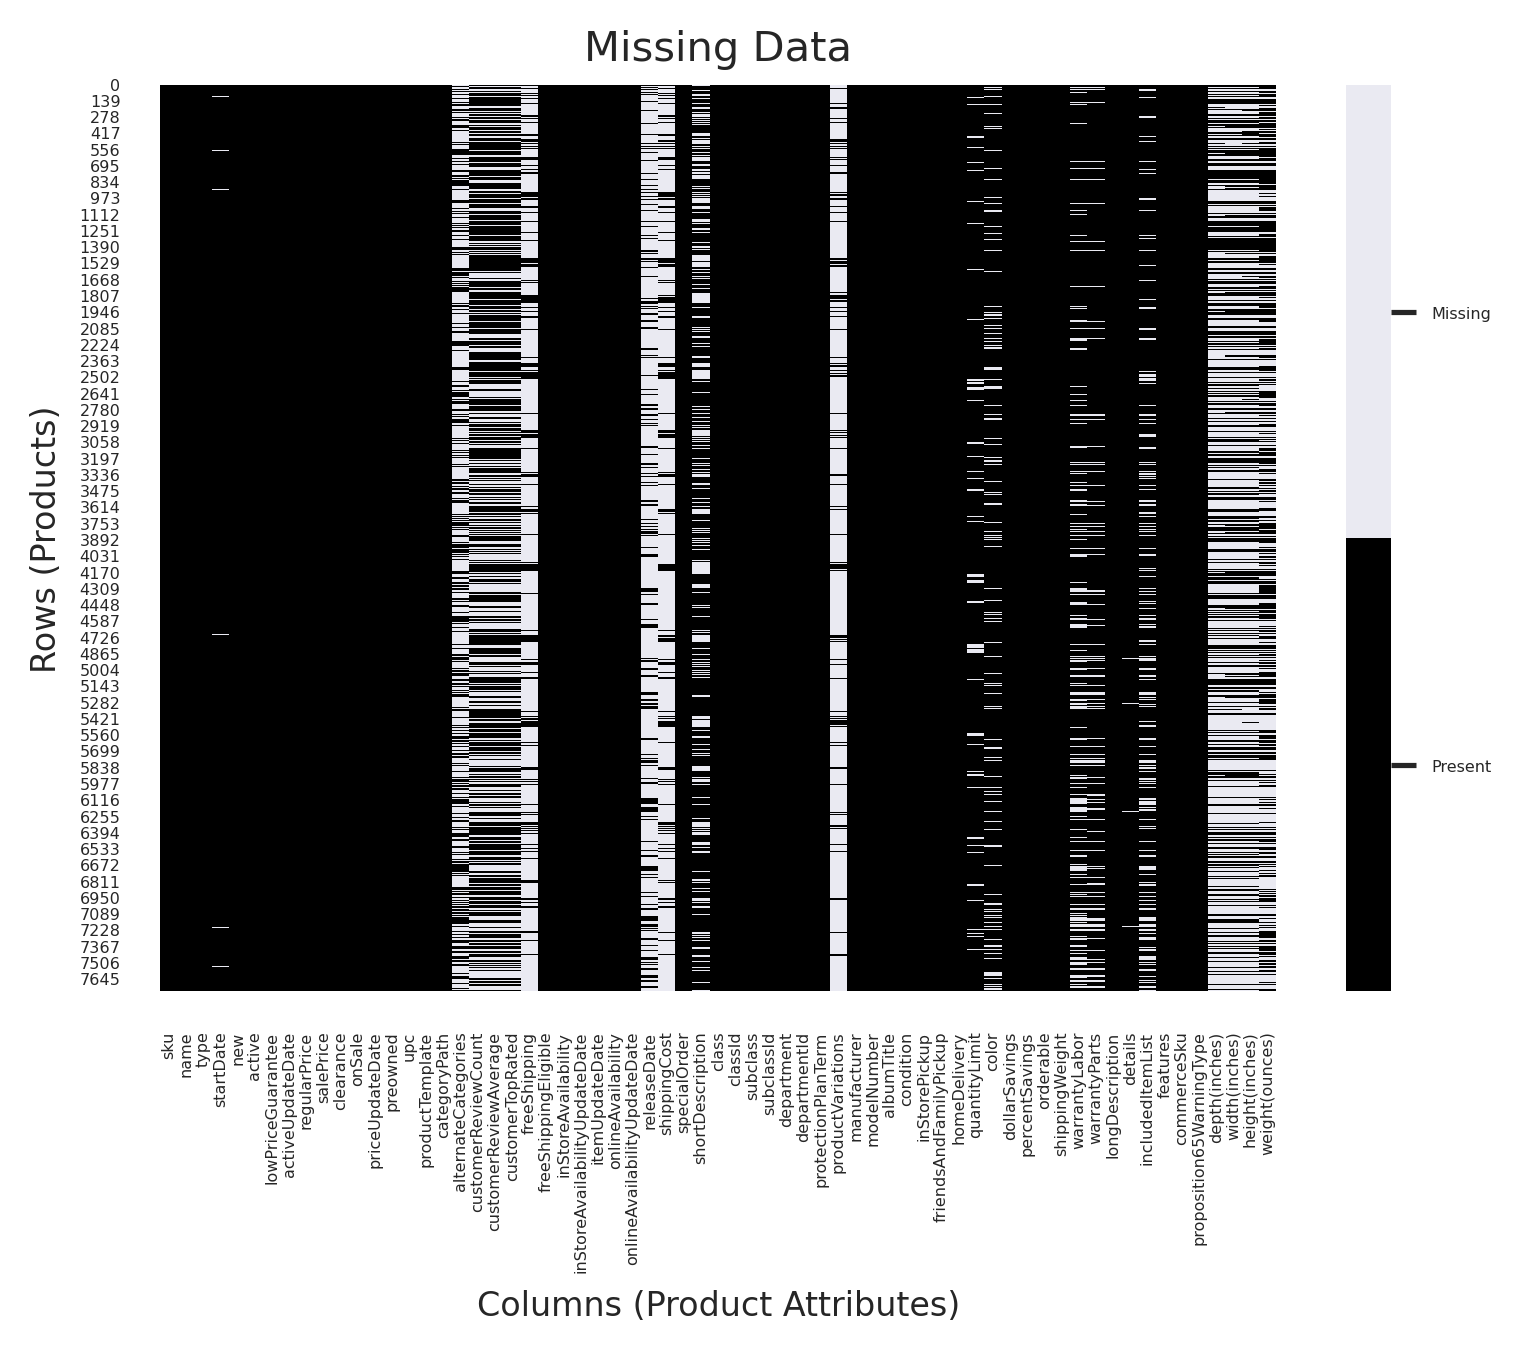

In [13]:
sns.set(font_scale = 0.35)
myColors = ((0.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0, 0.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
ax = sns.heatmap(df_filtered.isnull(), cmap=cmap, linecolor='lightgray')

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Present','Missing'])

ax.set_ylabel('Rows (Products)',fontsize = 8)
ax.set_xlabel('Columns (Product Attributes)',fontsize = 8)
ax.set_title("Missing Data",fontsize = 10)

_, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.show()

### Export the filtered dataframe for subsequent exploratory data analysis

In [14]:
df_filtered.to_csv('/home/mslobody/Desktop/Best_buy_Project/Data/Filtered_Headphones.csv', sep = ',')  